# Group 4 - Avengers

## Exploratory Data Analysis and Data Cleaning on Restaurant Expenditure Analysis

In [1]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning")
df =pd.read_excel('RES_Dataset for cleaning.xlsx')

In [3]:
df.shape

(4807, 37)

In [4]:
df.head()

,NEWID,AGE_REF,SEX,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Food at home this quarter,...,"('AGE', 9)","('AGE', 10)","('AGE', 11)","('AGE', 12)","('AGE', 13)",AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
0,5011064,87,Female,3,37.0,Oklahoma,1,57240.2,10669.1001,2212.0,...,NaN,NaN,NaN,NaN,NaN,0,0,3,931.0,0
1,5011134,73,Female,2,36.0,Ohio,0,55570.0,11434.2500,1690.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2,0.0,0
2,5011244,47,Female,2,39.0,Pennsylvania,2,145387.0,24199.7501,1300.0,...,NaN,NaN,NaN,NaN,NaN,0,2,0,1140.0,0
3,5011314,82,Female,1,20.0,Maine,0,10082.0,8025.0000,910.0,...,NaN,NaN,NaN,NaN,NaN,0,0,1,780.0,0
4,5011334,87,Male,2,8.0,Delaware,0,50481.0,9367.0000,1196.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2,650.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NEWID                                          4807 non-null   int64  
 1   AGE_REF                                        4807 non-null   int64  
 2   SEX                                            4807 non-null   object 
 3   FAM_SIZE                                       4807 non-null   int64  
 4   STATE CODE                                     4415 non-null   float64
 5   STATE NAME                                     4176 non-null   object 
 6   No of Income Earners                           4807 non-null   int64  
 7   Family Income after Taxes                      4807 non-null   float64
 8   Expenditures this quarter                      4807 non-null   float64
 9   Food at home this quarter                      4807 

## Handling Missing Values

### Columns with Missing Values

In [6]:
missing_values = df.isnull().sum()   #finding missing values using isnull function
missing_values

NEWID                                               0
AGE_REF                                             0
SEX                                                 0
FAM_SIZE                                            0
STATE CODE                                        392
STATE NAME                                        631
No of Income Earners                                0
Family Income after Taxes                           0
Expenditures this quarter                           0
Food at home this quarter                           0
Expenditure without food at home this quarter       0
Hours worked by spouse per week                  3280
GOT MARRIED                                         0
MARRIED WITH CHILDREN                               0
NEVER MARRIED                                       0
DIVORCED                                            0
SEPERATED                                           0
SINGLE                                              0
MARRIED                     

In [7]:
total_entries = len(df)
print("Total number of rows in the dataset",total_entries)

Total number of rows in the dataset 4807


### Calculating the percentage of missing values for each column

In [8]:
#calculating percentage of each column

missing_values_percentage = (missing_values / total_entries) * 100

# Create a DataFrame to display column names and their corresponding percentage of missing values
missing_percentage_df = pd.DataFrame({'Column Name': missing_values_percentage.index, 'Percentage Missing (%)': missing_values_percentage.values})

# Display the DataFrame
print(missing_percentage_df)


                                      Column Name  Percentage Missing (%)
0                                           NEWID                0.000000
1                                         AGE_REF                0.000000
2                                             SEX                0.000000
3                                        FAM_SIZE                0.000000
4                                      STATE CODE                8.154774
5                                      STATE NAME               13.126690
6                            No of Income Earners                0.000000
7                       Family Income after Taxes                0.000000
8                     Expenditures this quarter                  0.000000
9                       Food at home this quarter                0.000000
10  Expenditure without food at home this quarter                0.000000
11                Hours worked by spouse per week               68.233826
12                                    

### Descriptive Statistics of the dataset 

In [9]:
Descriptive_stats = df.describe()
Descriptive_stats

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,Hours worked by spouse per week,...,"('AGE', 9)","('AGE', 10)","('AGE', 11)","('AGE', 12)","('AGE', 13)",AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
count,4.807000e+03,4807.000000,4807.000000,4415.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,1527.000000,...,13.000000,10.000000,3.000000,2.0,1.0,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,5.165009e+06,53.899105,2.340961,26.574179,1.250468,88550.920221,12634.875408,1248.822897,10770.455216,39.984283,...,13.384615,3.100000,3.333333,2.0,0.0,0.663824,0.750780,0.954857,611.411206,32.716039
std,9.341853e+04,17.805756,1.447382,16.391171,1.002331,76918.876437,14060.896296,1024.386861,10399.435685,11.852623,...,12.079862,1.595131,0.577350,0.0,NaN,1.131100,0.869973,0.855960,1023.353539,179.054660
min,5.011064e+06,16.000000,1.000000,1.000000,0.000000,-331819.400000,20.000000,0.000000,-3230.000000,2.000000,...,4.000000,1.000000,3.000000,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.095433e+06,39.000000,1.000000,12.000000,0.000000,36277.200000,4944.575050,541.666700,4044.000000,40.000000,...,5.000000,2.000000,3.000000,2.0,0.0,0.000000,0.000000,0.000000,94.333300,0.000000
50%,5.207302e+06,55.000000,2.000000,26.000000,1.000000,67902.000000,8961.000000,975.000000,7742.000000,40.000000,...,7.000000,3.000000,3.000000,2.0,0.0,0.000000,0.000000,1.000000,346.666700,0.000000
75%,5.254916e+06,68.000000,3.000000,40.000000,2.000000,117893.500000,15491.958300,1642.000000,13931.666050,45.000000,...,13.000000,4.750000,3.500000,2.0,0.0,1.000000,1.000000,2.000000,780.000000,0.000000
max,5.286191e+06,87.000000,13.000000,55.000000,8.000000,683154.600000,357008.188100,11349.000000,74450.166600,99.000000,...,38.000000,5.000000,4.000000,2.0,0.0,11.000000,5.000000,5.000000,32910.000000,5514.000000


### Visual representation of missing values in heat map before data cleaning

<Axes: >

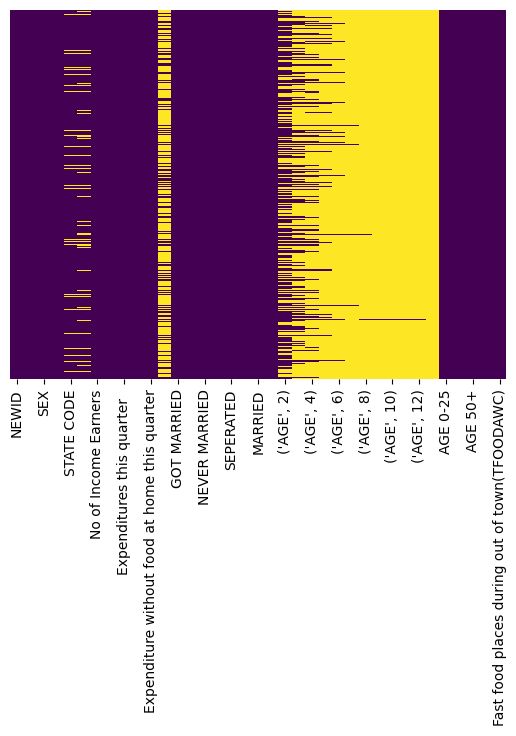

In [10]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

###  Handling missing values by dropping columns which has more than 50% of its data as null values

In [11]:
df.drop(["('AGE', 1)", "('AGE', 2)", "('AGE', 3)", "('AGE', 4)", "('AGE', 5)", "('AGE', 6)", 
                "('AGE', 7)", "('AGE', 8)", "('AGE', 9)", "('AGE', 10)", "('AGE', 11)", "('AGE', 12)", 
                "('AGE', 13)"], axis=1, inplace=True)

In [12]:
df.drop(["GOT MARRIED","MARRIED WITH CHILDREN","DIVORCED","SEPERATED","NEVER MARRIED"], axis=1, inplace=True)


In [13]:
df.drop("Hours worked by spouse per week", axis=1, inplace=True) 

In [14]:
new_missing_values = df.isnull().sum()
print("Missing values in the dataset", new_missing_values)

Missing values in the dataset NEWID                                              0
AGE_REF                                            0
SEX                                                0
FAM_SIZE                                           0
STATE CODE                                       392
STATE NAME                                       631
No of Income Earners                               0
Family Income after Taxes                          0
Expenditures this quarter                          0
Food at home this quarter                          0
Expenditure without food at home this quarter      0
SINGLE                                             0
MARRIED                                            0
AGE 0-25                                           0
AGE 25-50                                          0
AGE 50+                                            0
Food Away From Last Quarter (FDAWAYPQ)             0
Fast food places during out of town(TFOODAWC)      0
dtype: int64


### Handling missing values for state code and State name

In [15]:
# Replacing 'N/A' values in the 'state name' column with the corresponding state codes as defined in the data dictionary.

df.loc[df['STATE CODE'] == 53, 'STATE NAME'] = 'Washington'
df.loc[df['STATE CODE'] == 54, 'STATE NAME'] = 'Virginia'
df.loc[df['STATE CODE'] == 55, 'STATE NAME'] = 'Wisconsin'

In [16]:
State_missing_values = df.isnull().sum()
print("Missing values in the dataset", State_missing_values)

Missing values in the dataset NEWID                                              0
AGE_REF                                            0
SEX                                                0
FAM_SIZE                                           0
STATE CODE                                       392
STATE NAME                                       392
No of Income Earners                               0
Family Income after Taxes                          0
Expenditures this quarter                          0
Food at home this quarter                          0
Expenditure without food at home this quarter      0
SINGLE                                             0
MARRIED                                            0
AGE 0-25                                           0
AGE 25-50                                          0
AGE 50+                                            0
Food Away From Last Quarter (FDAWAYPQ)             0
Fast food places during out of town(TFOODAWC)      0
dtype: int64


In [17]:
df.shape

(4807, 18)

### Dropping remaining rows of missing values from the state code and state name

In [18]:

# Removing rows where 'STATE CODE' is missing to ensure that we only consider entries with valid state codes

df1 = df.dropna(subset=['STATE CODE'])

# Then, filter out rows where 'STATE NAME' is '#N/A'

df1 = df1[df1['STATE NAME'] != '#N/A']


In [19]:
df1.shape

(4415, 18)

### Verifying missing values in columns after cleaning

In [42]:

Total_missing_values = df1.isnull().sum()
print("Total Missing values in the dataset after data cleaning", Total_missing_values)

Total Missing values in the dataset after data cleaning NEWID                                            0
AGE_REF                                          0
SEX                                              0
FAM_SIZE                                         0
STATE CODE                                       0
STATE NAME                                       0
No of Income Earners                             0
Family Income after Taxes                        0
Expenditures this quarter                        0
Food at home this quarter                        0
Expenditure without food at home this quarter    0
SINGLE                                           0
MARRIED                                          0
AGE 0-25                                         0
AGE 25-50                                        0
AGE 50+                                          0
Food Away From Last Quarter (FDAWAYPQ)           0
Fast food places during out of town(TFOODAWC)    0
dtype: int64


### Visual representation of missing values in heat map after data cleaning

<Axes: >

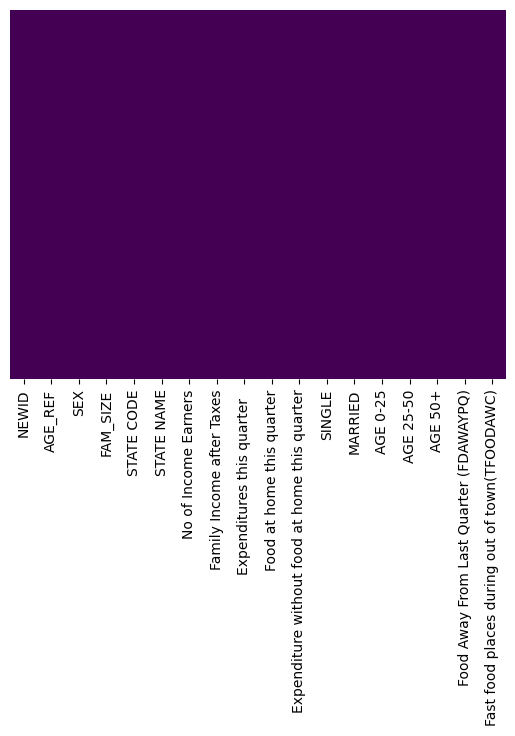

In [21]:
# Visualize missing values in the DataFrame using a heatmap with 'viridis' colormap, 
sns.heatmap(df1.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## Handling Negative values in the columns

In [22]:
numeric_columns = df1.select_dtypes(include='number').columns

# Check for negative values in each numeric column
for column in numeric_columns:
    has_negative = (df1[column] < 0).any()
    if has_negative:
        print(f"Column '{column}' has negative values.")

Column 'Family Income after Taxes' has negative values.
Column 'Expenditure without food at home this quarter' has negative values.


In [23]:
df1.loc[df1['Family Income after Taxes'] < 0 ,'Family Income after Taxes'] = 0

## Handling Outliers

In [24]:
#function to calculate outliers in numerical columns

def calculate_numerical_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1                                         #calculating IQR and then lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR                                  
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

 #function for calculating percentage of outliers in each column   
def calculate_numerical_outlier_percentage(df1):
    outlier_percentage = {}
    for column in df1.columns:
        outliers = calculate_numerical_outliers(df1[column])
        if not outliers.empty:
            outlier_percentage[column] = len(outliers) / len(df1[column]) * 100
    return outlier_percentage

outlier_percentage = calculate_numerical_outlier_percentage(df1)

C:\Users\satya\AppData\Local\Temp\ipykernel_14420\2588668149.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return pd.Series([])


In [44]:
# Outliers percentage for each feature

for column, percentage in {key: value for key, value in outlier_percentage.items() if value != 0.0}.items():
     print(f"{column}: {percentage:.2f}%")

FAM_SIZE: 1.25%
No of Income Earners: 0.02%
Family Income after Taxes: 2.36%
Expenditures this quarter  : 6.52%
Food at home this quarter: 3.26%
Expenditure without food at home this quarter: 4.53%
AGE 0-25: 7.47%
Food Away From Last Quarter (FDAWAYPQ): 6.61%
Fast food places during out of town(TFOODAWC): 9.78%


In [26]:
def replace_outliers_with_percentile(series, percentile=95):
    percentile_value = series.quantile(percentile / 100)
    std_dev = series.std()
    outlier_threshold = 3  # Defining the threshold for detecting outliers 3 standard deviations away from the mean
    lower_bound = percentile_value - outlier_threshold * std_dev
    upper_bound = percentile_value + outlier_threshold * std_dev
    return series.apply(lambda x: percentile_value if x < lower_bound or x > upper_bound else x)

# Apply the function to numerical columns only
df1_numerical = df1.select_dtypes(include='number')
df1_numerical = df1_numerical.apply(replace_outliers_with_percentile, percentile=95)

# Updating the original DataFrame with the modified numerical columns
df1[df1_numerical.columns] = df1_numerical


In [27]:
def calculate_numerical_outliers(column):
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return outliers
    else:
        return pd.Series([])

def calculate_numerical_outlier_percentage(df1_numerical):
    outlier_percentage = {}
    for column in df1_numerical.columns:
        outliers = calculate_numerical_outliers(df1_numerical[column])
        if not outliers.empty:
            outlier_percentage[column] = len(outliers) / len(df1_numerical[column]) * 100
    return outlier_percentage

outlier_percentage = calculate_numerical_outlier_percentage(df1_numerical)

### Saving the Cleaned Restaurant Dataset to an Excel File

In [28]:

# Defining the file path for the cleaned dataset

output_file_path = ("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning\\RES_dataset cleaned.xlsx")

# Save the cleaned DataFrame to an Excel file
df1.to_excel(output_file_path, index=False)



In [43]:
#reading the new cleaned restaurant dataset for further analysis

new_df = pd.read_excel("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\\1.MidTerm\\Data Cleaning\\RES_dataset cleaned.xlsx")

In [30]:
# Remove leading and trailing whitespaces from column names in the DataFrame 'new_df'.
new_df.columns = new_df.columns.str.strip()


### Descriptive statistics of the dataset after data cleaning

In [31]:
new_df.describe()

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
count,4.415000e+03,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000,4415.000000
mean,5.165224e+06,58.951529,2.334541,28.440091,1.257305,110511.245434,12296.600931,1349.836315,12513.302905,0.379388,1.496036,0.658664,0.761721,0.941336,594.670669,20.888335
std,9.347813e+04,16.827597,1.411879,16.362303,0.999966,82049.269328,10797.733317,1007.404164,10750.837402,0.485290,0.500041,1.087329,0.863514,0.853019,735.695729,80.944087
min,5.011064e+06,29.000000,1.000000,4.000000,0.000000,17627.800000,20.000000,166.666700,1352.666600,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.095528e+06,45.000000,1.000000,12.000000,0.000000,47651.500000,5020.500000,606.666700,4806.666650,0.000000,1.000000,0.000000,0.000000,0.000000,108.333300,0.000000
50%,5.207302e+06,60.000000,2.000000,28.000000,1.000000,83958.600000,9131.900100,1040.000000,8794.000000,0.000000,1.000000,0.000000,0.000000,1.000000,366.666700,0.000000
75%,5.255061e+06,73.000000,3.000000,42.000000,2.000000,147678.700000,15740.083300,1775.500000,16139.650150,1.000000,2.000000,1.000000,2.000000,2.000000,800.000000,0.000000
max,5.286191e+06,87.000000,9.000000,55.000000,6.000000,454894.700000,77549.000100,6240.000000,63835.666700,1.000000,2.000000,6.000000,4.000000,4.000000,5260.000000,751.000000


## Distribution of dependent and independent variables

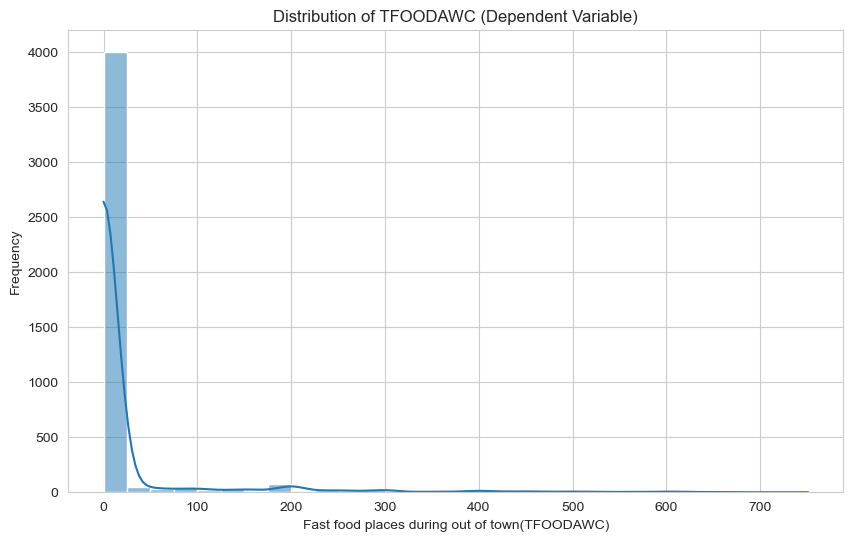

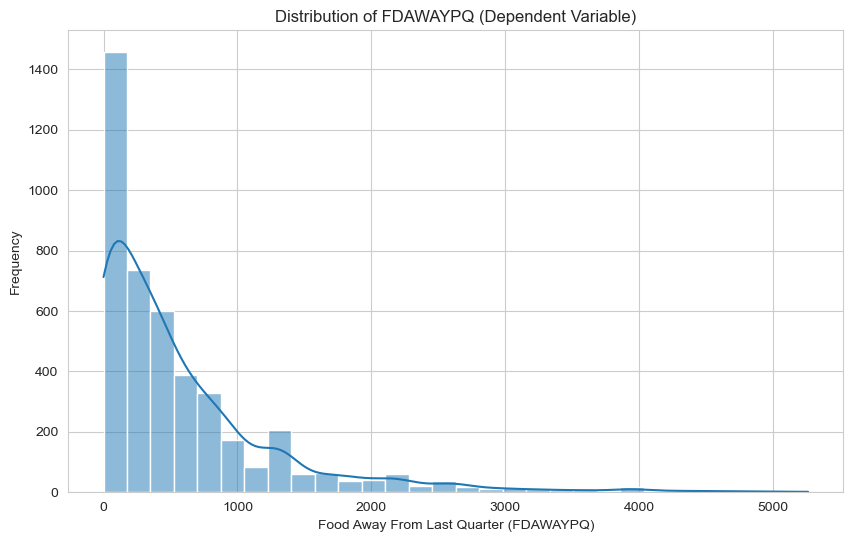

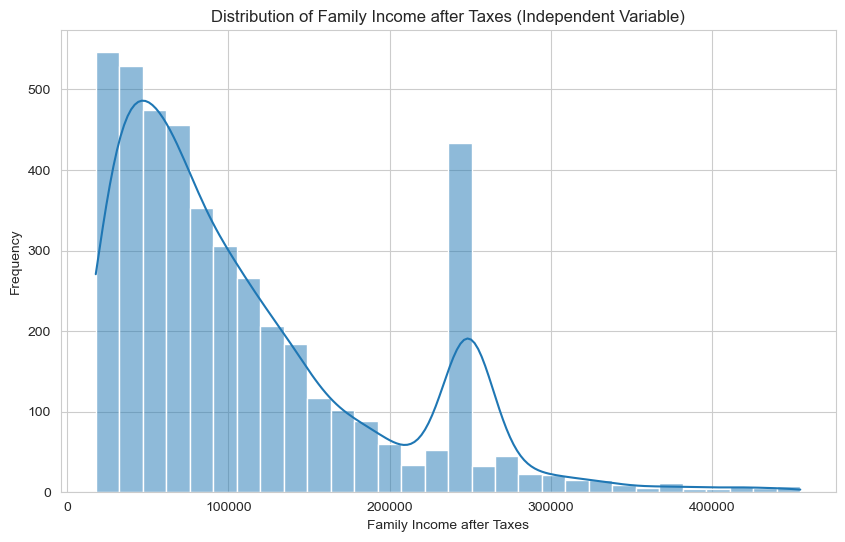

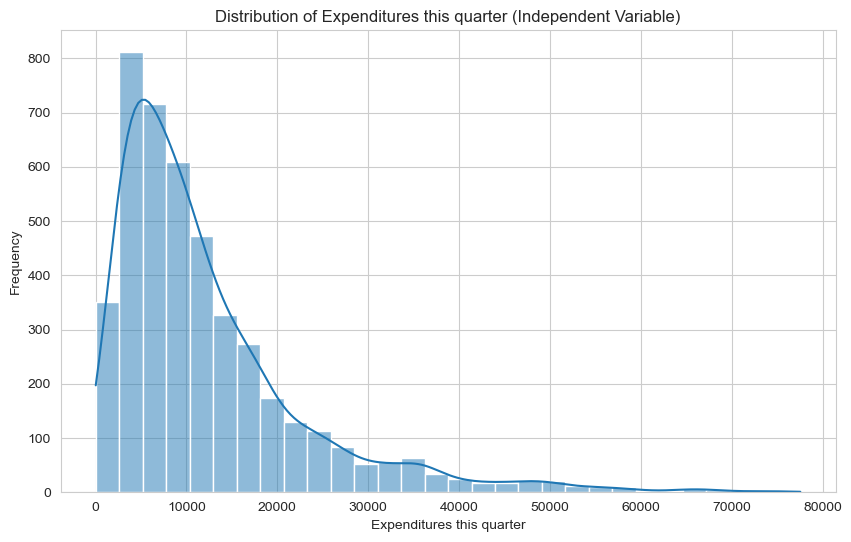

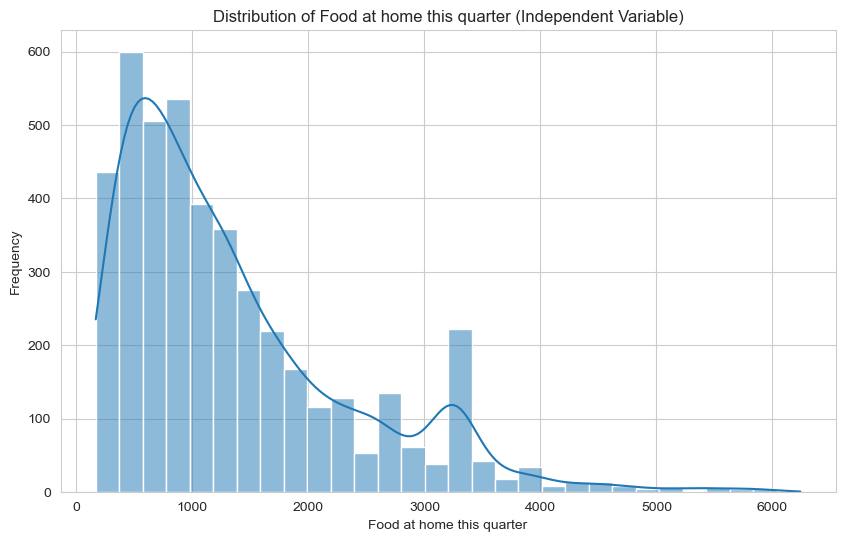

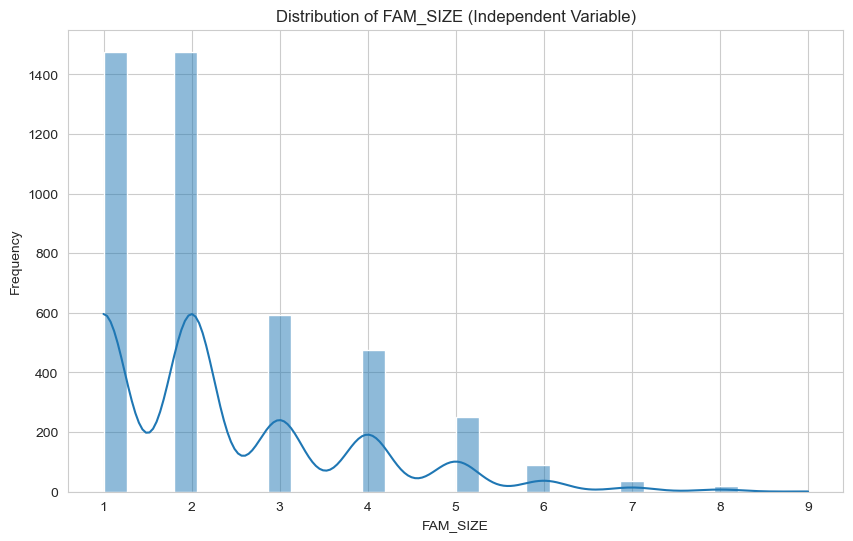

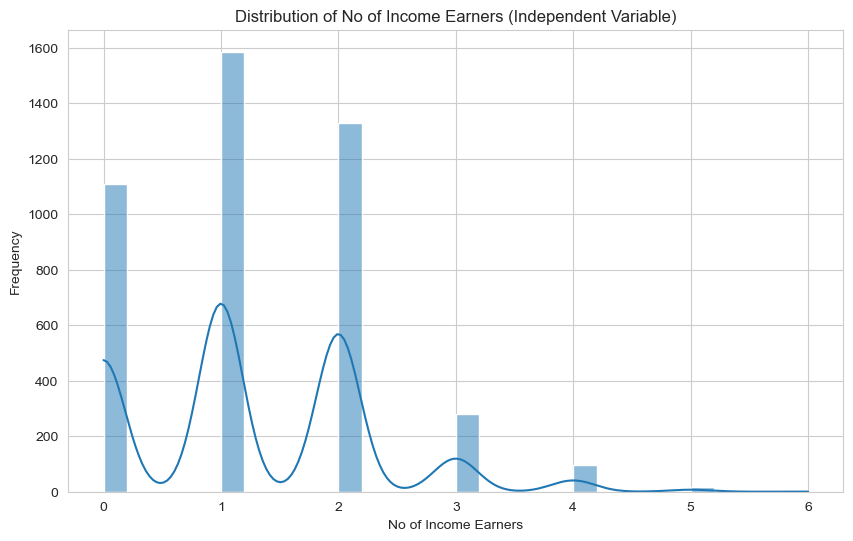

In [32]:
# Set the style of the plots
sns.set_style("whitegrid")

# Defining a function to create distribution plots for variables
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distribution of the dependent variables including outliers
plot_distribution(new_df, 'Fast food places during out of town(TFOODAWC)', 'Distribution of TFOODAWC (Dependent Variable)')
plot_distribution(new_df, 'Food Away From Last Quarter (FDAWAYPQ)', 'Distribution of FDAWAYPQ (Dependent Variable)')

# Choosing few important independent variables to visualize.
important_independent_vars = ['Family Income after Taxes', 'Expenditures this quarter', 'Food at home this quarter', 'FAM_SIZE', 'No of Income Earners']
  

for var in important_independent_vars:
    plot_distribution(new_df, var, f'Distribution of {var} (Independent Variable)')


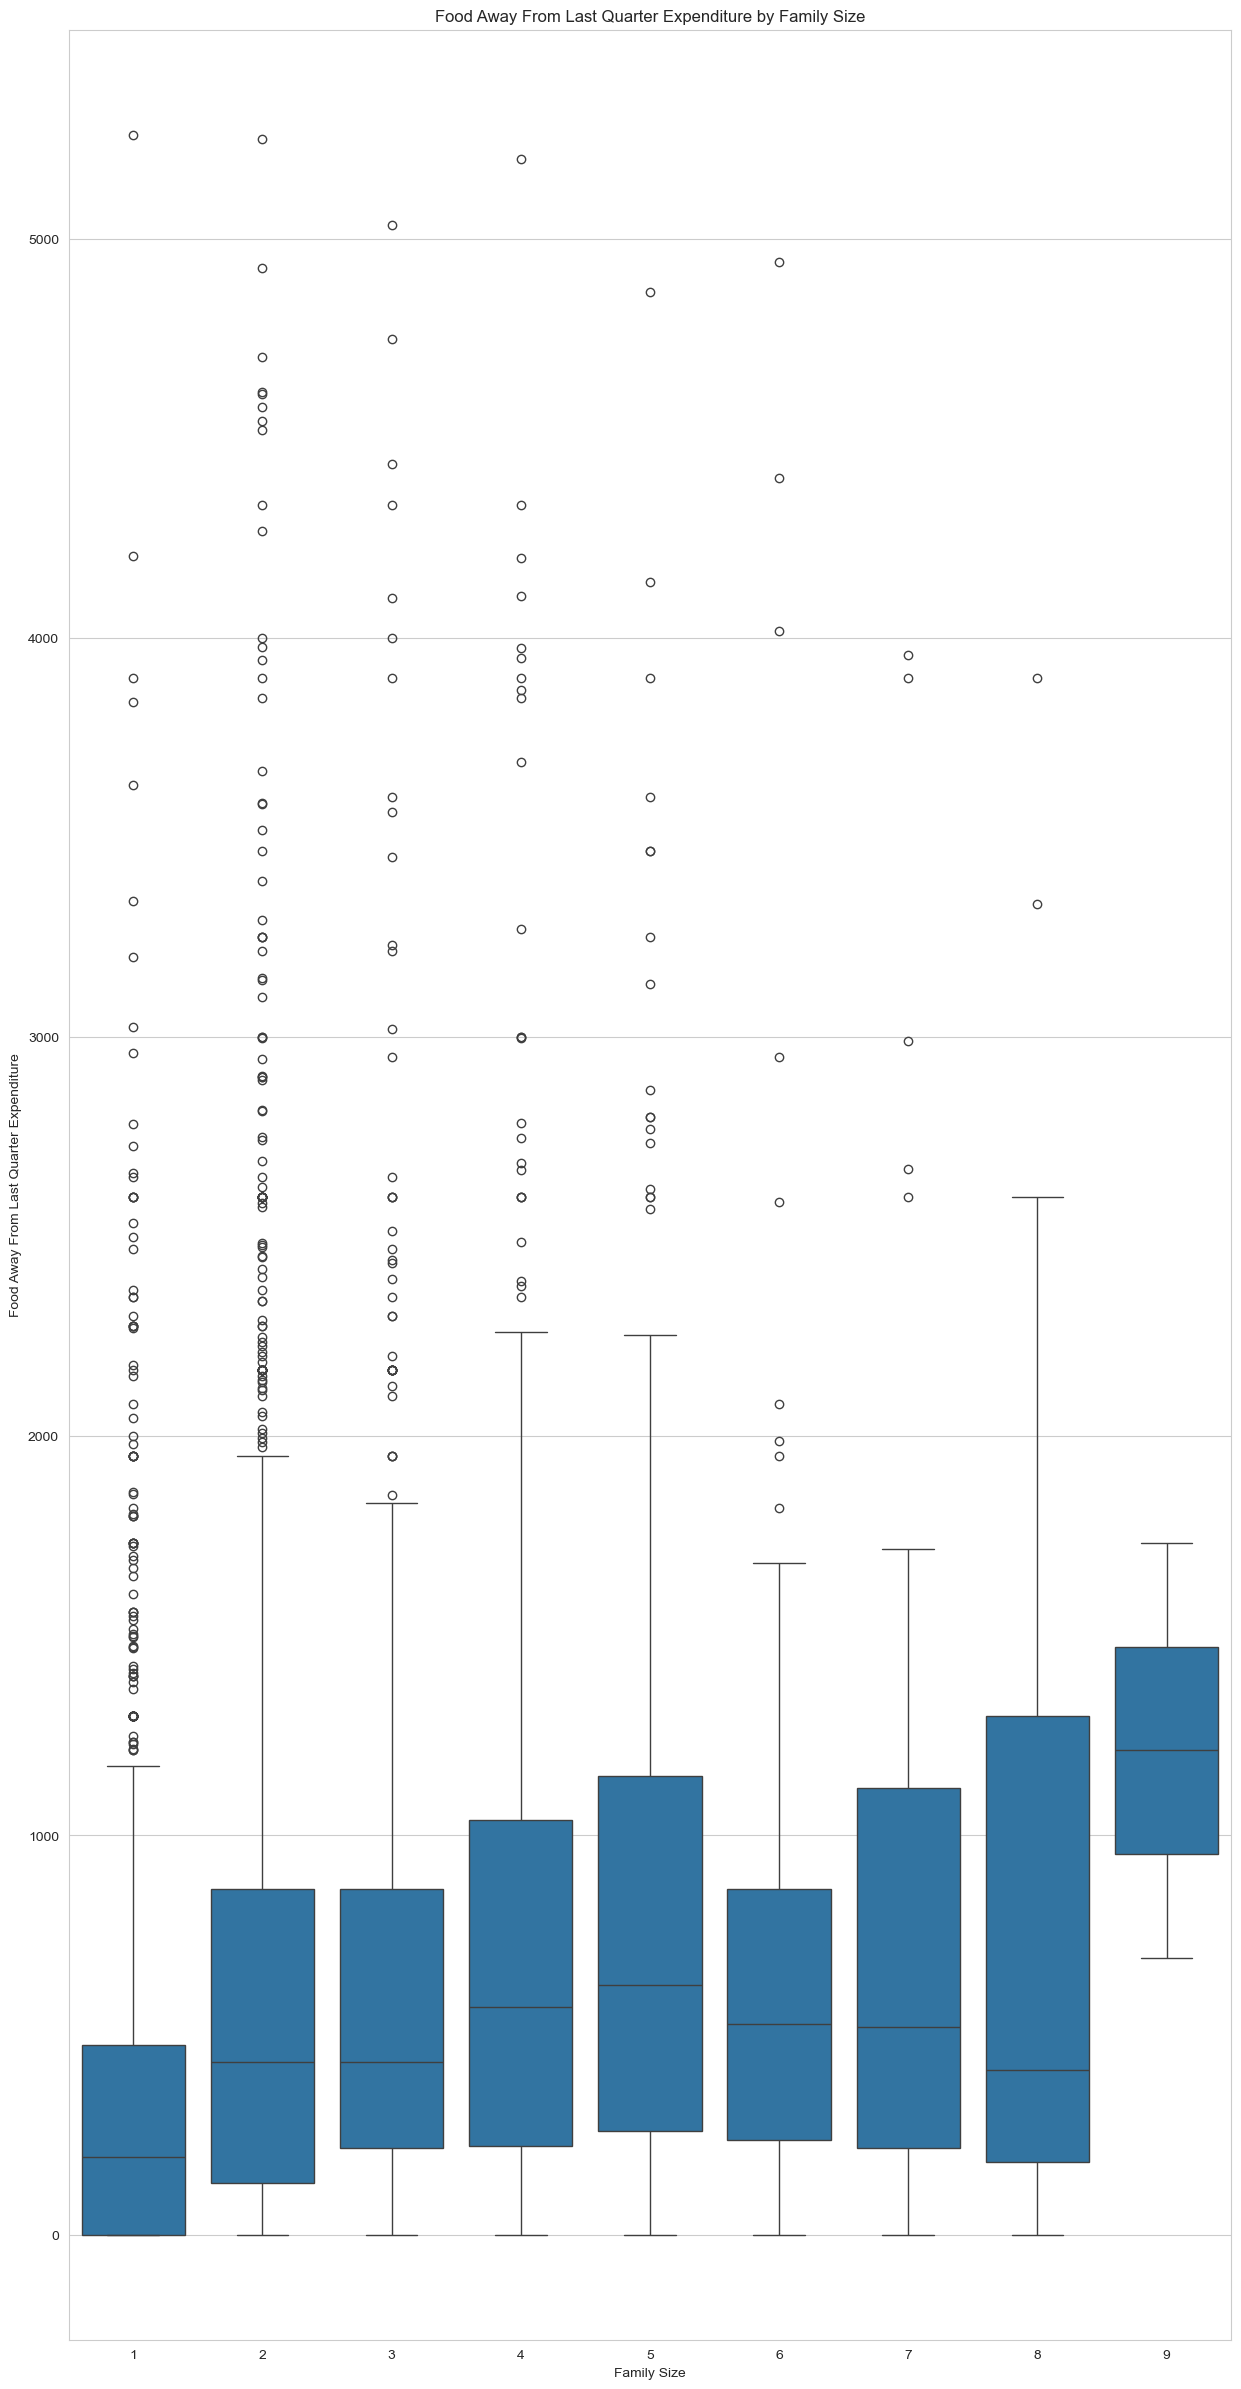

In [33]:
# Box plot for Food Away From Last Quarter (FDAWAYPQ) vs. Family Size
plt.figure(figsize=(15, 30))
sns.boxplot(x='FAM_SIZE', y='Food Away From Last Quarter (FDAWAYPQ)', data=new_df)
plt.title('Food Away From Last Quarter Expenditure by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Food Away From Last Quarter Expenditure')
plt.show()

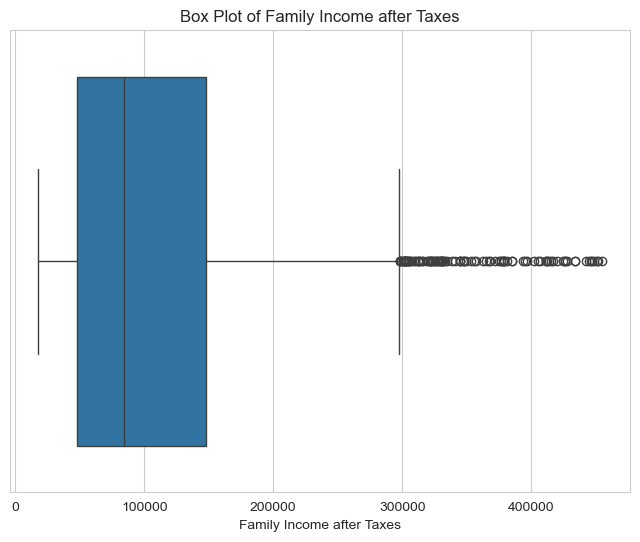

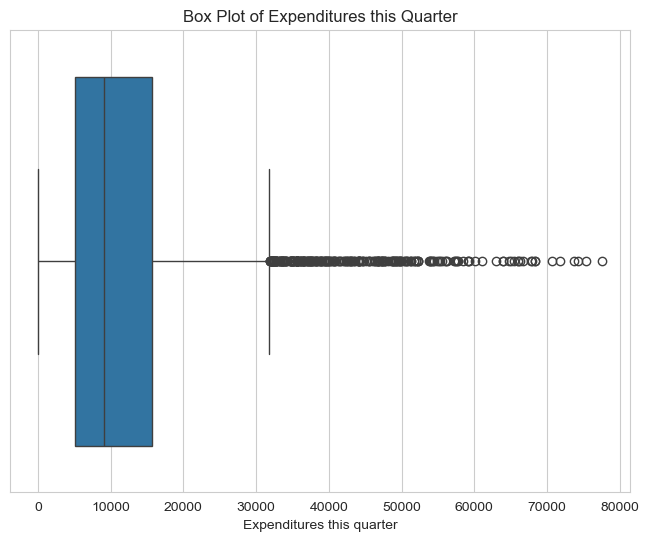

In [34]:
# Box plot for 'Family Income after Taxes'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Family Income after Taxes'])
plt.title('Box Plot of Family Income after Taxes')
plt.show()

# Box plot for 'Expenditures this quarter'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Expenditures this quarter'])
plt.title('Box Plot of Expenditures this Quarter')
plt.show()



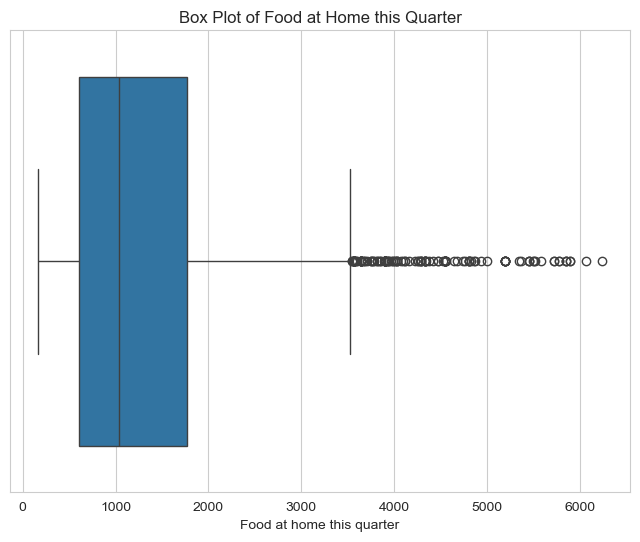

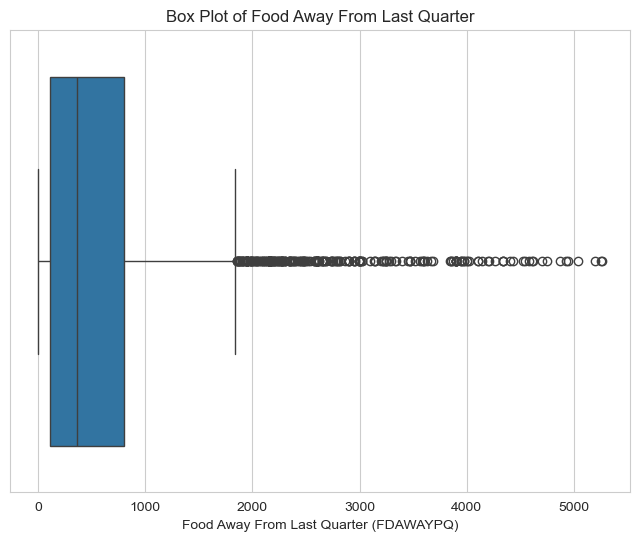

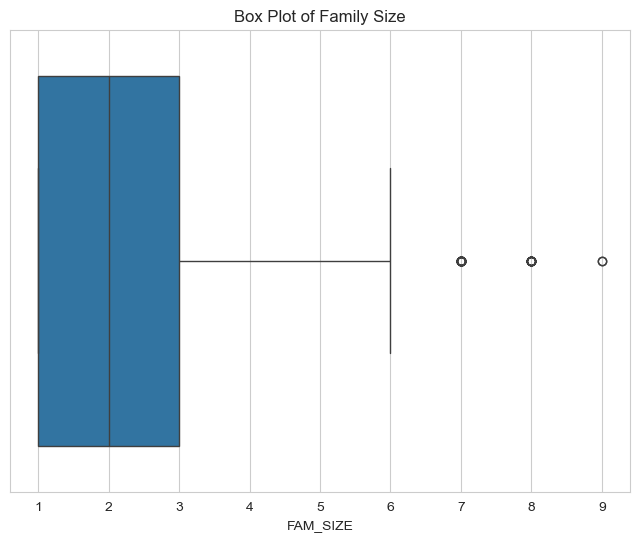

In [35]:
# Box plot for 'Food at home this quarter'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Food at home this quarter'])
plt.title('Box Plot of Food at Home this Quarter')
plt.show()


# Box plot for 'Food Away From Last Quarter (FDAWAYPQ)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['Food Away From Last Quarter (FDAWAYPQ)'])
plt.title('Box Plot of Food Away From Last Quarter')
plt.show()


# Box plot for 'FAM_SIZE'
plt.figure(figsize=(8, 6))
sns.boxplot(x=new_df['FAM_SIZE'])
plt.title('Box Plot of Family Size')
plt.show()

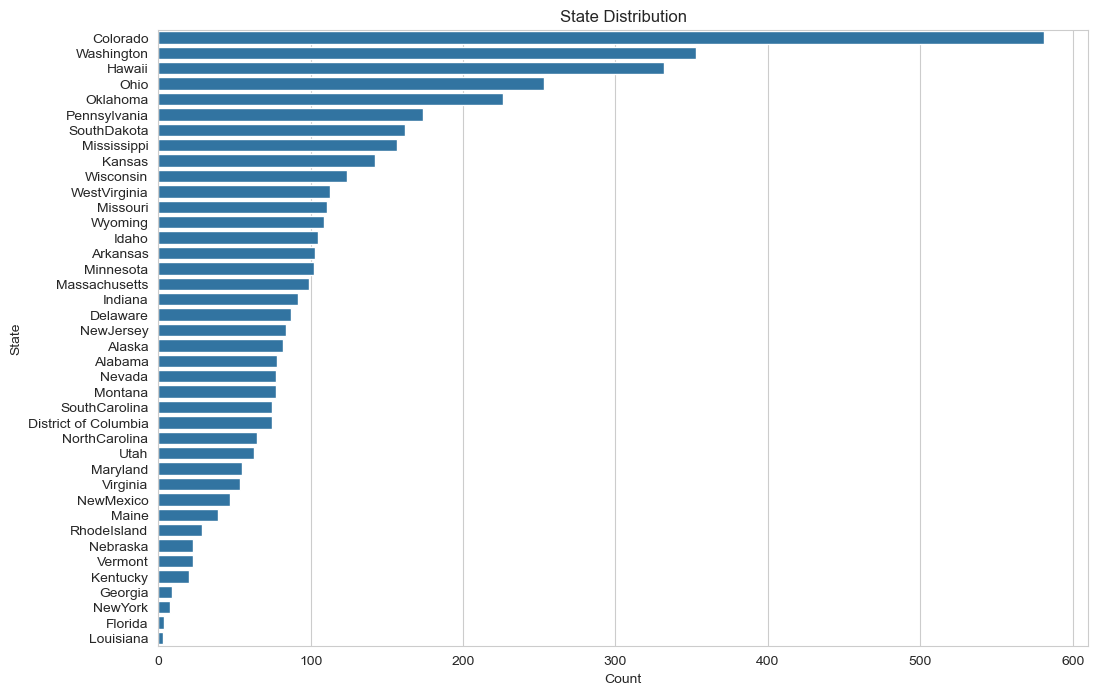

In [36]:
#State Distribution

plt.figure(figsize=(12, 8))
state_counts = df['STATE NAME'].value_counts()
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('State Distribution')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


In [37]:
# Generating a correlation matrix as a DataFrame
corr_matrix = new_df.corr()
corr_matrix

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Expenditures this quarter,Food at home this quarter,Expenditure without food at home this quarter,SINGLE,MARRIED,AGE 0-25,AGE 25-50,AGE 50+,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
NEWID,1.000000,-0.017833,-0.003527,0.011511,0.008215,-0.001257,-0.038002,-0.039997,-0.002896,0.015576,-0.011499,0.006869,-0.002828,-0.008133,-0.035751,0.020791
AGE_REF,-0.017833,1.000000,-0.363606,-0.004556,-0.386794,-0.111508,-0.158979,-0.117261,-0.073292,0.000754,-0.166629,-0.329407,-0.588578,0.401871,-0.164063,-0.066164
FAM_SIZE,-0.003527,-0.363606,1.000000,0.003452,0.606879,0.178202,0.241794,0.311864,0.102757,-0.356559,0.486592,0.834552,0.599826,-0.010036,0.196026,0.039499
STATE CODE,0.011511,-0.004556,0.003452,1.000000,-0.012419,-0.031276,-0.041823,-0.043055,-0.043269,-0.011788,0.014155,0.024044,-0.006591,-0.020095,-0.060167,-0.020702
No of Income Earners,0.008215,-0.386794,0.606879,-0.012419,1.000000,0.249934,0.302462,0.216969,0.151610,-0.177865,0.345929,0.428345,0.557452,-0.086149,0.254206,0.088872
Family Income after Taxes,-0.001257,-0.111508,0.178202,-0.031276,0.249934,1.000000,0.330189,0.151478,0.332136,-0.152943,0.206472,0.097425,0.149743,0.028390,0.260663,0.117563
Expenditures this quarter,-0.038002,-0.158979,0.241794,-0.041823,0.302462,0.330189,1.000000,0.432256,0.759968,-0.206020,0.283803,0.136655,0.178144,0.053427,0.550620,0.026621
Food at home this quarter,-0.039997,-0.117261,0.311864,-0.043055,0.216969,0.151478,0.432256,1.000000,0.403404,-0.152459,0.194701,0.246025,0.170509,0.033862,0.311304,-0.056051
Expenditure without food at home this quarter,-0.002896,-0.073292,0.102757,-0.043269,0.151610,0.332136,0.759968,0.403404,1.000000,-0.123386,0.145762,0.050606,0.076240,0.030252,0.408022,0.016014
SINGLE,0.015576,0.000754,-0.356559,-0.011788,-0.177865,-0.152943,-0.206020,-0.152459,-0.123386,1.000000,-0.775692,-0.135356,-0.132390,-0.296482,-0.117902,-0.058078


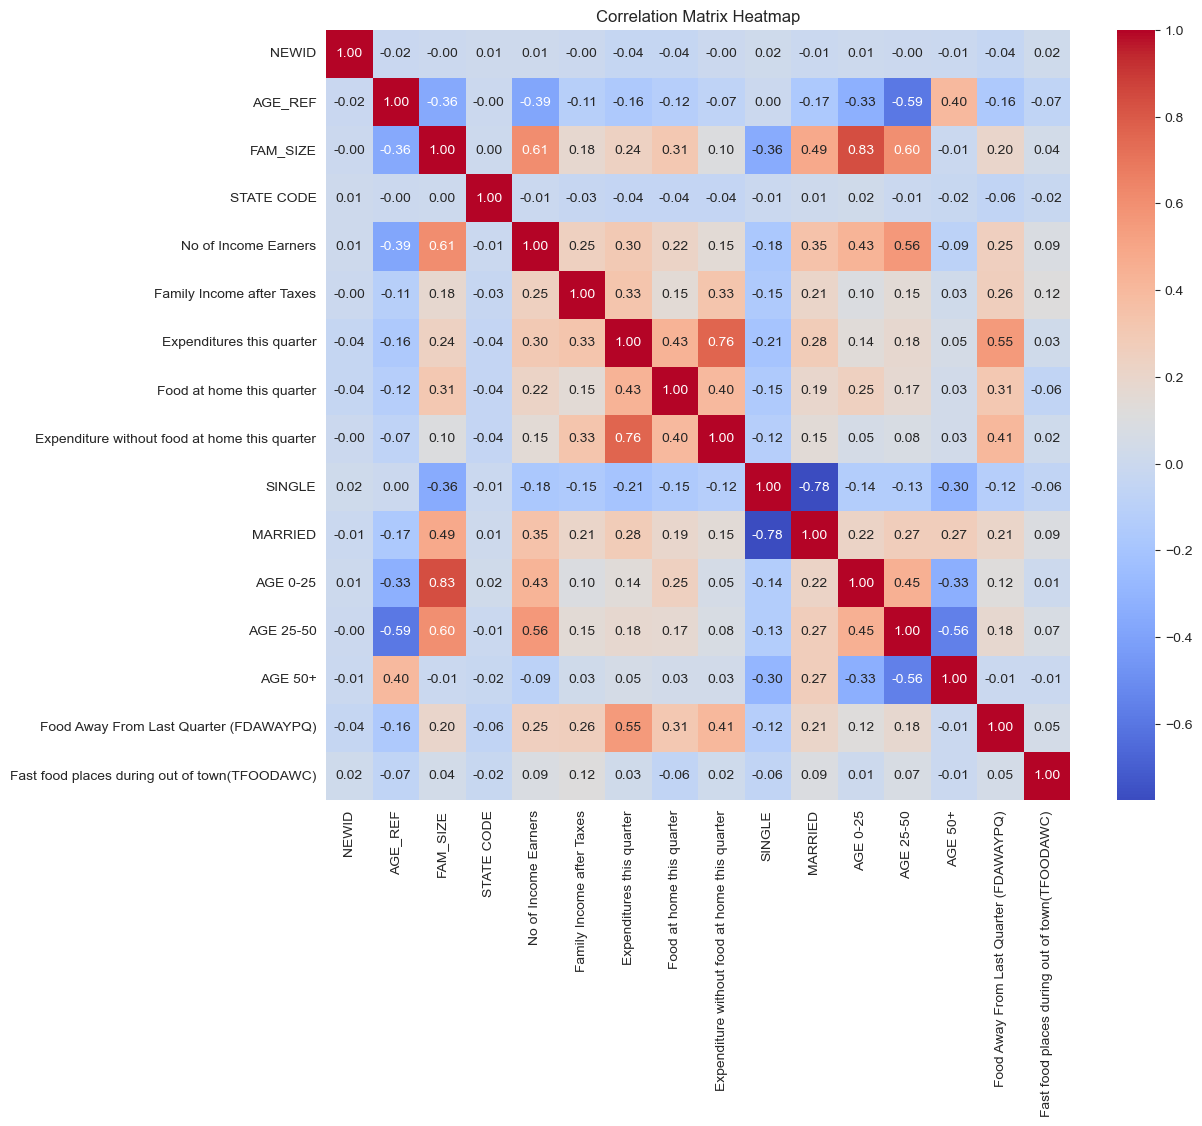

In [38]:
# Correlation Matrix

corr_matrix = new_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


## Summary visuals 


## pair plots

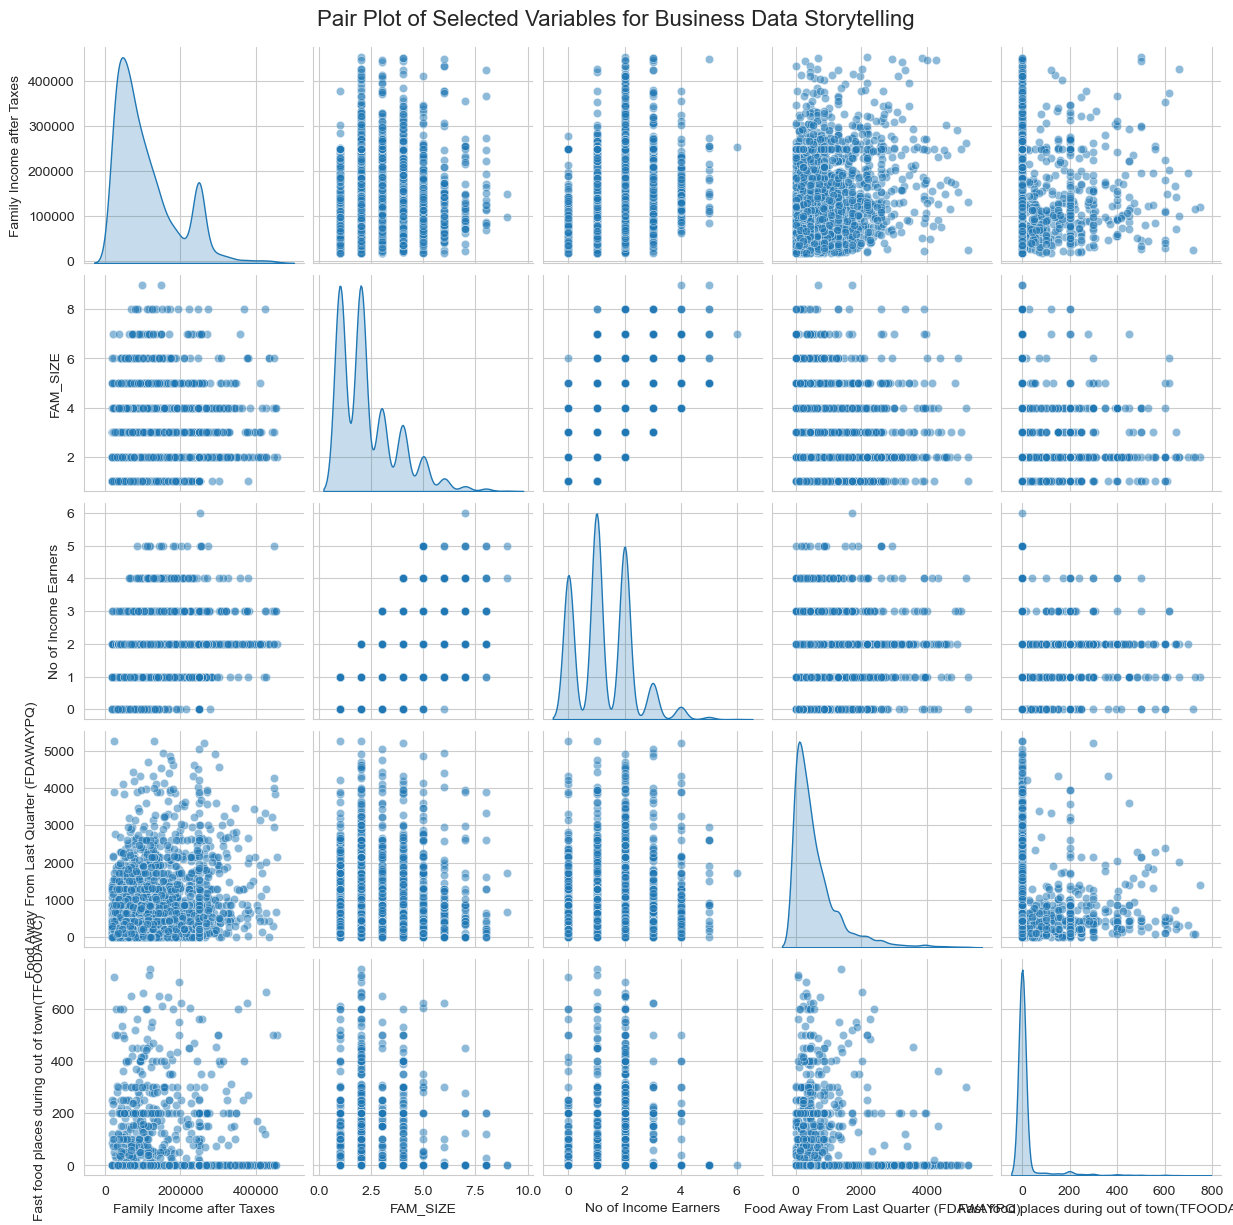

In [39]:
# creating a pair plot for the selected variables including the dependent variable

# Selecting the variables for the pair plot
storytelling_vars = [
    'Family Income after Taxes',
    'FAM_SIZE',
    'No of Income Earners',
    'Food Away From Last Quarter (FDAWAYPQ)',
    'Fast food places during out of town(TFOODAWC)'
]

# Creating the pair plot
pair_plot_data = new_df[storytelling_vars]
sns.pairplot(pair_plot_data, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Variables for Business Data Storytelling', size=16)
plt.subplots_adjust(top=0.95)
plt.show()


C:\Users\satya\AppData\Local\Temp\ipykernel_14420\2975794557.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = new_df.groupby(income_brackets)['Fast food places during out of town(TFOODAWC)', 'Food Away From Last Quarter (FDAWAYPQ)'].mean().reset_index()


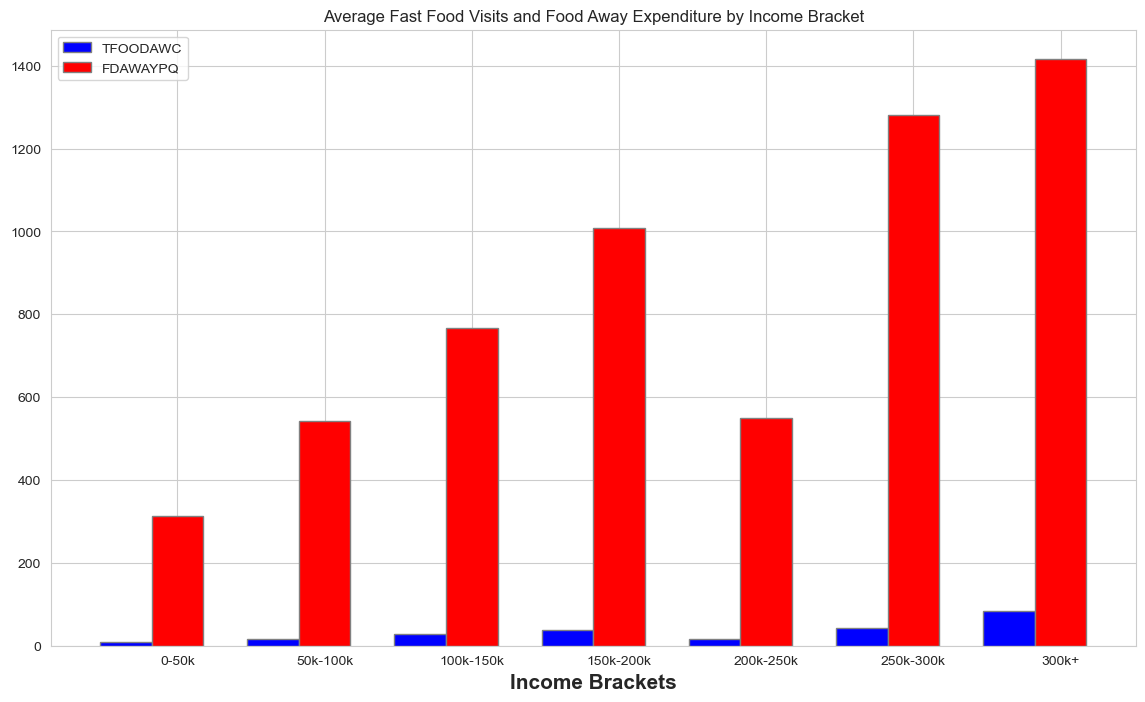

In [40]:
# First, we define income brackets. 
# Adjust the range and bins according to the distribution of the 'Family Income after Taxes' variable.
income_brackets = pd.cut(new_df['Family Income after Taxes'], bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, np.inf], 
                         labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k+'])

# Grouping by the income brackets and calculate the mean for the two dependent variables
grouped_data = new_df.groupby(income_brackets)['Fast food places during out of town(TFOODAWC)', 'Food Away From Last Quarter (FDAWAYPQ)'].mean().reset_index()

# plot the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Defining the width of the bars
bar_width = 0.35

#position of bar on X axis
r1 = np.arange(len(grouped_data['Fast food places during out of town(TFOODAWC)']))
r2 = [x + bar_width for x in r1]

# plotting the bar plot
plt.bar(r1, grouped_data['Fast food places during out of town(TFOODAWC)'], color='blue', width=bar_width, edgecolor='grey', label='TFOODAWC')
plt.bar(r2, grouped_data['Food Away From Last Quarter (FDAWAYPQ)'], color='red', width=bar_width, edgecolor='grey', label='FDAWAYPQ')

# Add xticks on the middle of the group bars
plt.xlabel('Income Brackets', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(r1))], grouped_data['Family Income after Taxes'])

# showing graph
plt.legend()
plt.title('Average Fast Food Visits and Food Away Expenditure by Income Bracket')
plt.show()